# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:





---
Cara Kerja K means Clustering
---



---
1. inisiasi jumlah klaster 
2. menentukan posisi centroid secara acak
3. menghitung jarak dari data point ke centroid
4. membuat centroid baru berdasar hasil dari perhitungan jarak data poin ke centroid sebelumnya
5.  melihat ulang jaraknya apakah ada perubahan, bila terjadi perubahan maka mengulan step ke 2 sampai hasilny konvergen











---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()



,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [2]:
# Handling Missing Value
df.fillna(method = 'ffill', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        250 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


<AxesSubplot:xlabel='Skor Belanja (1-100)'>

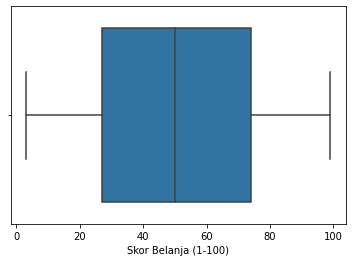

In [3]:
# Handling Outlier

Q1 = np.percentile(df[['Skor Belanja (1-100)','Umur']], 25)
Q3 = np.percentile(df[['Skor Belanja (1-100)','Umur']], 75)
IQR = Q3 - Q1 

upper = np.where(df[['Skor Belanja (1-100)','Umur']] >= (Q3+1.5*IQR))
lower = np.where(df[['Skor Belanja (1-100)','Umur']] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

sns.boxplot(data = df,
           x = 'Skor Belanja (1-100)')


In [4]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_bersih = df.loc[:,['Umur','Skor Belanja (1-100)']]


,Umur,Skor Belanja (1-100)
0,-1.455005,-0.396407
1,-1.304215,1.119369
2,-1.379610,-1.587373
3,-1.153425,0.975009
4,-0.550263,-0.360317
...,...,...
243,-0.851844,0.686290
244,1.560802,-1.298654
245,-0.248682,1.444178
246,-0.097892,-0.649036


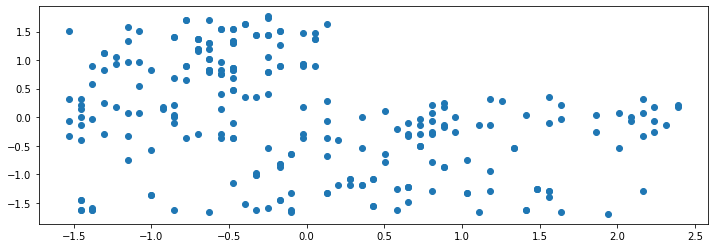

In [5]:
# Standardized the data
fig, ax = plt.subplots(figsize=(12, 4))
df_bersih.dropna(axis = 0, inplace = True)


df_scaled = scaler.fit_transform(df_bersih[['Umur','Skor Belanja (1-100)']])
df_scaled = pd.DataFrame(df_scaled,columns = ['Umur','Skor Belanja (1-100)'])

ax.scatter(data = df_scaled,
           x = 'Umur',
           y = 'Skor Belanja (1-100)')

df_scaled

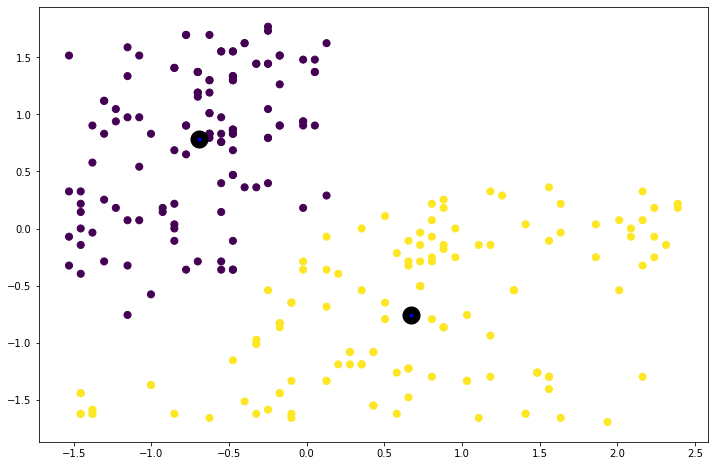

In [6]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 2)
member = kmeans.fit_predict(df_scaled)
centre = kmeans.cluster_centers_

plt.figure(figsize = (12,8))
plt.scatter(data = df_scaled,
           x = 'Umur',
           y = 'Skor Belanja (1-100)',
           c = member,
           s = 50
           )

# Titik Centre point
plt.scatter(centre[:,0],
            centre[:,1], 
            c = 'b', 
            edgecolors = 'k', 
            s = 50, 
            linewidths = 11)

Text(0.5, 1.0, 'The Elbow Method')

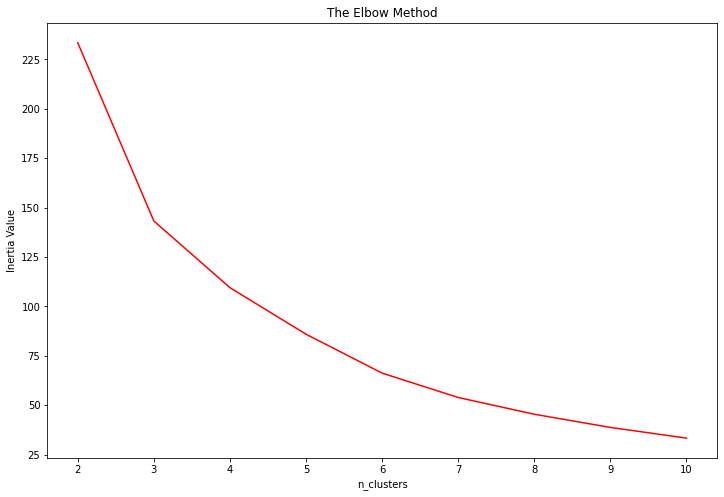

In [20]:
import sklearn
score = []


for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    member = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

plt.figure(figsize = (12,8))
plt.plot(range(2, 11), score, 'r-')
plt.ylabel('Inertia Value')
plt.xlabel('n_clusters')
plt.title('The Elbow Method')


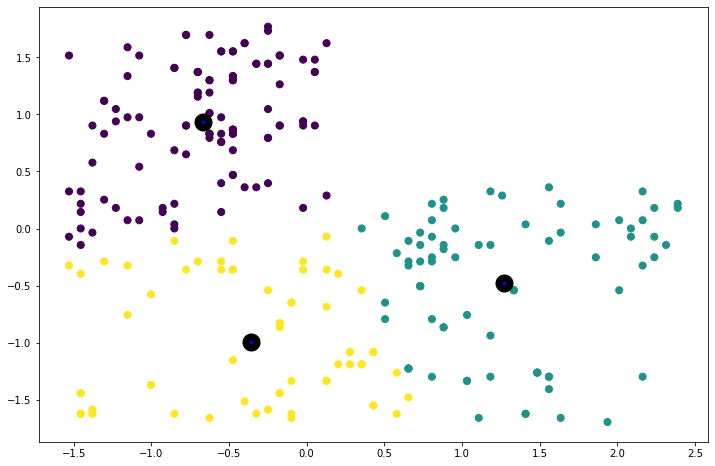

In [16]:
kmeans = KMeans(n_clusters = 3)
member = kmeans.fit_predict(df_scaled)
centre = kmeans.cluster_centers_

plt.figure(figsize = (12,8))
plt.scatter(data = df_scaled,
           x = 'Umur',
           y = 'Skor Belanja (1-100)',
           c = member,
           s = 50
           )

# Titik Centre point
plt.scatter(centre[:,0],
            centre[:,1], 
            c = 'b', 
            edgecolors = 'k', 
            s = 50, 
            linewidths = 11)

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: setelah membagi menjadi 3 kluster, ada kesimpulan yang dapat diambil yaitu terdapat 3 kelompok bebeda ketika umur di korelasikan dengan skor belanja. kelompok pertama adalah yang umurnya muda dan memberi skor belanja rendah, kelompok kedua adalah orang yang berumur lanjut dan memberi skor belanja yang rendah juga. kelompok ketiga adalah orang yang berumur masih muda namun sudah memberi skor belanja yang cukup tinggi.